# DICOM VIEWER

This project aims to develop a 3D DICOM (Digital Imaging and Communications in Medicine) viewer using Python. The viewer enables medical professionals and researchers to visualize and interact with medical imaging data in three dimensions. By leveraging Python's powerful libraries, this tool processes DICOM files—the standard format for medical imaging—and renders them into interactive 3D visualizations. The viewer supports various medical imaging modalities, making it a versatile solution for healthcare professionals who need to analyze and interpret medical scans effectively.

The sample dataset used in this project is sourced from:
[Alize Medical Imaging](https://www.aliza-dicom-viewer.com/download/datasets).


In [133]:
""" Import Library """

import pydicom
import matplotlib.pyplot as plt
import glob
import os
import py7zr
import numpy as np
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


In [134]:
""" Read DICOM file in current directory """

files_7z = glob.glob('*.7z')
print("Found .7z files:")
p7zip_files = []
for file in files_7z:
    print(f"- {file} ({os.path.getsize(file)/1024:.2f} KB)")
    p7zip_files.append(file)

Found .7z files:
- Siemens_ep2d_diff.7z (6469.68 KB)


In [135]:
""" Extract DICOM files from .7z archive """

extract_to = 'dicom_files'
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

for file in p7zip_files:
    with py7zr.SevenZipFile(file, mode='r') as z:
        z.extractall(path=extract_to)
        print(f"Extracted {file} to {extract_to}")

Extracted Siemens_ep2d_diff.7z to dicom_files


In [136]:
""" List DICOM files in the extracted directory """
dicom_files = []
for root, dirs, files in os.walk(extract_to):
    for file in files:
        if file.endswith('.dcm'):
            dicom_files.append(os.path.join(root, file))
print("Found DICOM files:")

Found DICOM files:


In [137]:
""" Load DICOM files and sort them by InstanceNumber """

datasets = [pydicom.dcmread(file) for file in dicom_files]
datasets.sort(key=lambda x: float(x.InstanceNumber))
volume = np.stack([ds.pixel_array for ds in datasets])
volume = volume.astype(np.int16)
print(f"Volume shape: {volume.shape}")

Volume shape: (100, 320, 320)


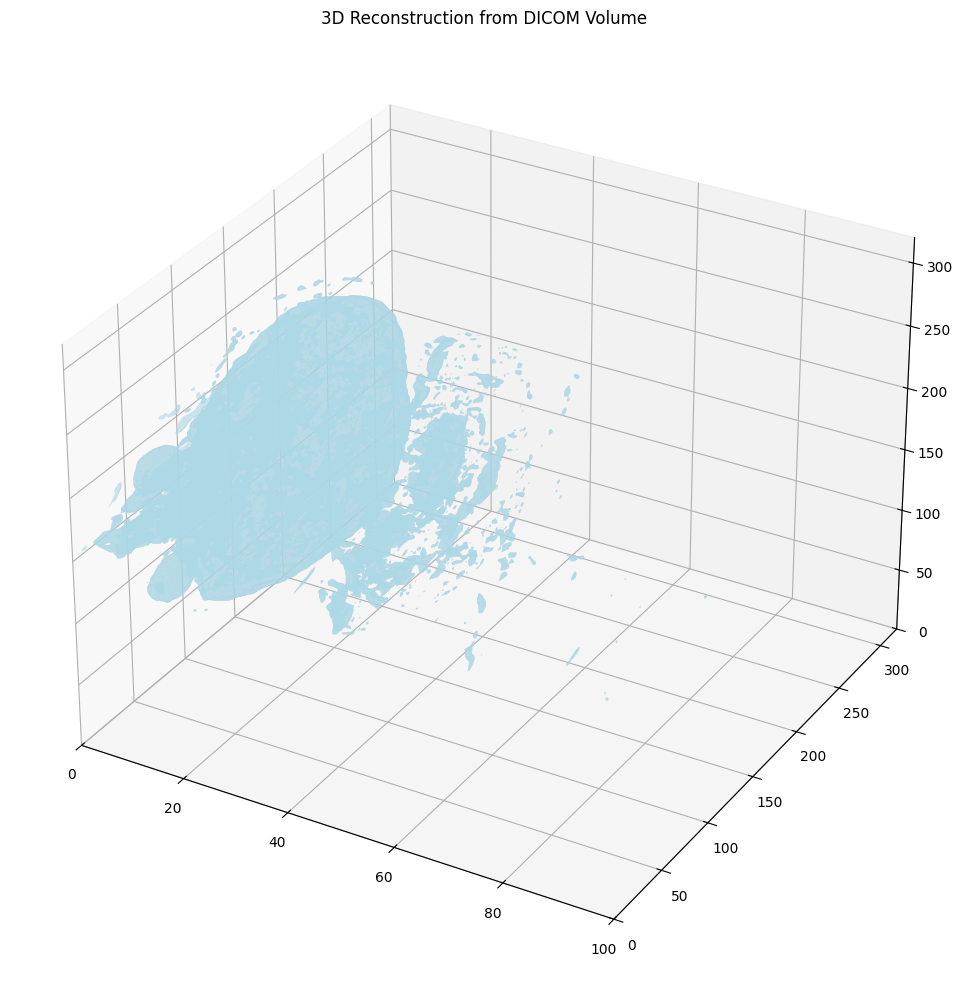

In [138]:
""" Extract 3D Mesh """

verts, faces, _, _ = measure.marching_cubes(volume, level=300)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

mesh = Poly3DCollection(verts[faces], alpha=0.7)
mesh.set_facecolor('lightblue')
ax.add_collection3d(mesh)

ax.set_xlim(0, volume.shape[0])
ax.set_ylim(0, volume.shape[1])
ax.set_zlim(0, volume.shape[2])

plt.title("3D Reconstruction from DICOM Volume")
plt.tight_layout()
plt.show()